운전자 없이 승용 및 화물 자동차를 리스 또는 임대하는 산업활동을 말한다.

<예시>
·승용차 임대
·리무진 임대
·버스 임대
·트럭 임대
·화물 자동차 임대
·레저용 차량 임대

In [5]:
# 한글문제 해결처리 
################################################################
import matplotlib.pyplot as plt 
from matplotlib import font_manager, rc
import platform
plt.rcParams['axes.unicode_minus'] = False
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')
    
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
# 경고문 숨기기
import warnings
warnings.filterwarnings(action='ignore')

def grap_year(data):
    data = str(data)
    return int(data[:4])

def grap_month(data):
    data = str(data)
    return int(data[4:])

In [6]:
data = pd.read_csv("업종별/자동차 임대업.csv", encoding='utf-8', index_col=0,parse_dates=['REG_YYMM'])

In [7]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26024 entries, 0 to 26023
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   REG_YYMM      26024 non-null  object
 1   CARD_SIDO_NM  26024 non-null  object
 2   CARD_CCG_NM   26024 non-null  object
 3   STD_CLSS_NM   26024 non-null  object
 4   HOM_SIDO_NM   26024 non-null  object
 5   HOM_CCG_NM    25840 non-null  object
 6   AGE           26024 non-null  object
 7   SEX_CTGO_CD   26024 non-null  int64 
 8   FLC           26024 non-null  int64 
 9   CSTMR_CNT     26024 non-null  int64 
 10  AMT           26024 non-null  int64 
 11  CNT           26024 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 2.6+ MB
None


In [8]:
#안쓰는 컬럼 드랍
df=data.drop(['CARD_CCG_NM', 'HOM_CCG_NM', 'STD_CLSS_NM'], axis=1)

In [9]:
df = df.fillna('')
df['year'] = df['REG_YYMM'].apply(lambda x: grap_year(x))
df['month'] = df['REG_YYMM'].apply(lambda x: grap_month(x))

In [6]:
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26024 entries, 0 to 26023
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   REG_YYMM      26024 non-null  object
 1   CARD_SIDO_NM  26024 non-null  object
 2   HOM_SIDO_NM   26024 non-null  object
 3   AGE           26024 non-null  object
 4   SEX_CTGO_CD   26024 non-null  int64 
 5   FLC           26024 non-null  int64 
 6   CSTMR_CNT     26024 non-null  int64 
 7   AMT           26024 non-null  int64 
 8   CNT           26024 non-null  int64 
 9   year          26024 non-null  int64 
 10  month         26024 non-null  int64 
dtypes: int64(7), object(4)
memory usage: 2.4+ MB
None
  REG_YYMM CARD_SIDO_NM HOM_SIDO_NM  AGE  SEX_CTGO_CD  FLC  CSTMR_CNT     AMT  \
0   201901           강원          강원  50s            1    4          3  530000   
1   201901           강원          강원  20s            1    1          3  281000   
2   201901           경기          경기  20s       

In [7]:
print(df.CARD_SIDO_NM.unique())
print(df.HOM_SIDO_NM.unique())

['강원' '경기' '경남' '경북' '광주' '대구' '대전' '부산' '서울' '울산' '인천' '전남' '전북' '제주'
 '충남' '충북']
['강원' '경기' '경남' '경북' '광주' '대구' '대전' '부산' '서울' '인천' '전남' '전북' '제주' '충남'
 '울산' '세종' '충북']


CARD_SIDO_NM
충북       13794347
인천       17301628
대전       21351647
충남       23614038
경북       48779271
강원       56786937
경남       64207614
울산       67169050
대구       73156926
광주       75413412
전북       81803285
전남       82541128
부산      201408067
서울     4770657611
제주     7539886305
경기    15240775734
Name: AMT, dtype: int64


Text(0.5, 1.0, '지역별 AMT')

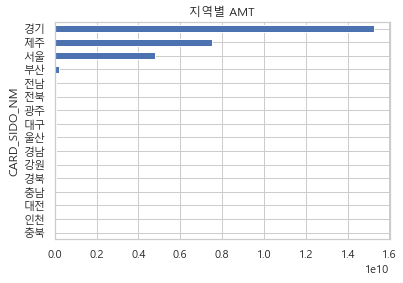

In [8]:
df1 = df.groupby('CARD_SIDO_NM')['AMT'].sum().sort_values()
print(df1)
df1.plot(kind="barh")
plt.title("지역별 AMT")

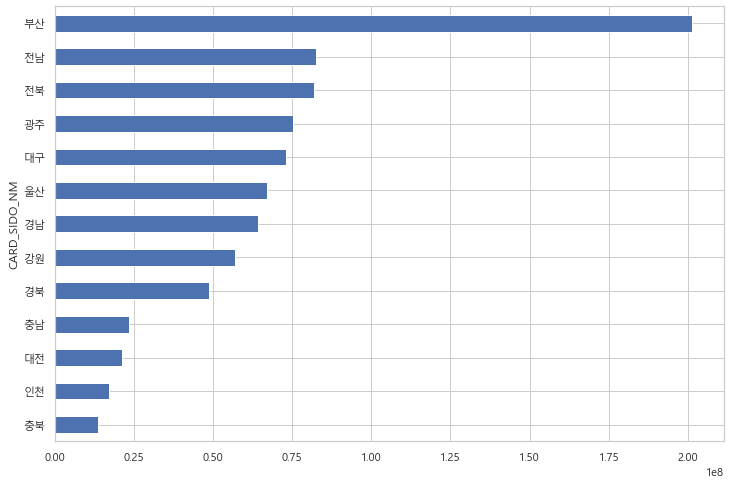

In [9]:
#경기, 제주, 서울 제외한 그래프
df1_1= df1[:13]
df1_1.plot(kind="barh", figsize=(12,8))

REG_YYMM
201901    1184211488
201902    1236359557
201903    1367813182
201904    1451322134
201905    1708248950
201906    1831610713
201907    2125831135
201908    2661603512
201909    1921817915
201910    2274187048
201911    2181674501
201912    2308485869
202001    2244079460
202002    1988182843
202003    1893218693
Name: AMT, dtype: int64


Text(0.5, 1.0, '기간별 AMT')

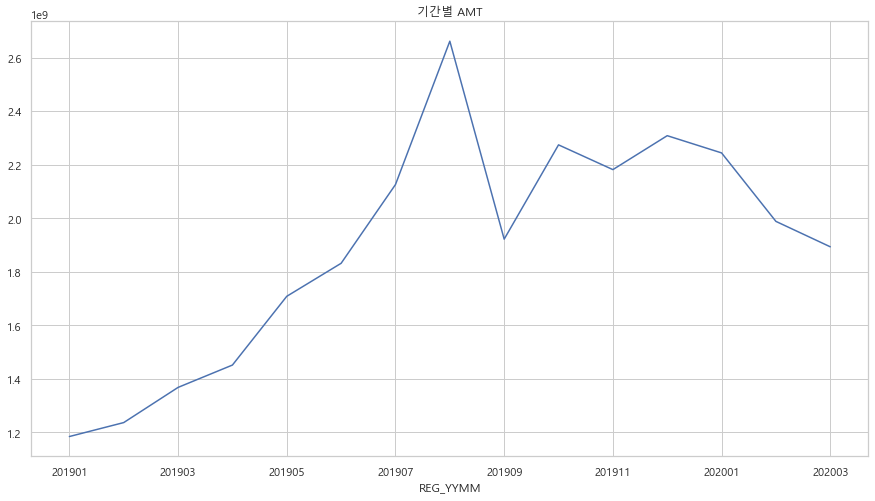

In [10]:
df2 = df.groupby('REG_YYMM')['AMT'].sum()
print(df2)
df2.plot(figsize=(15,8))
plt.title("기간별 AMT")

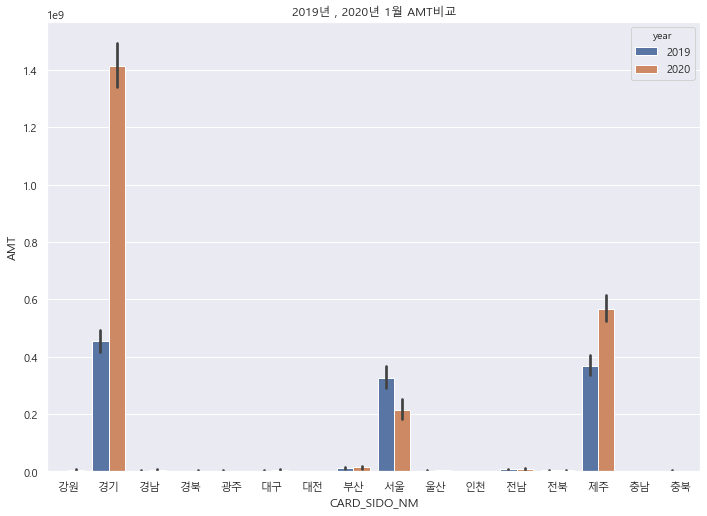

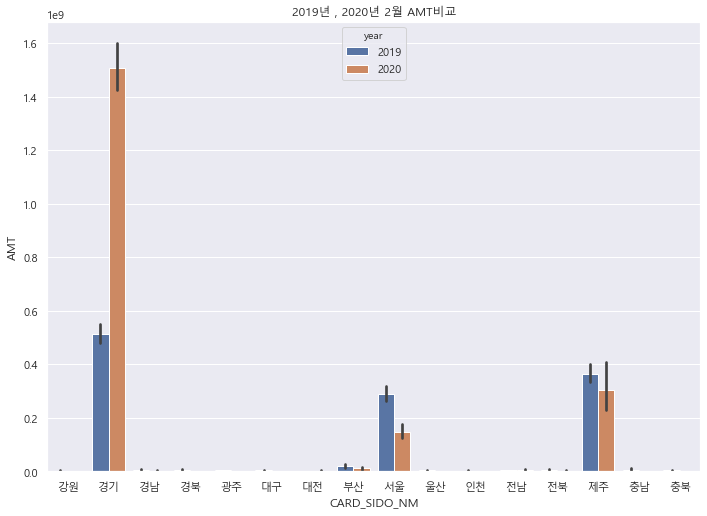

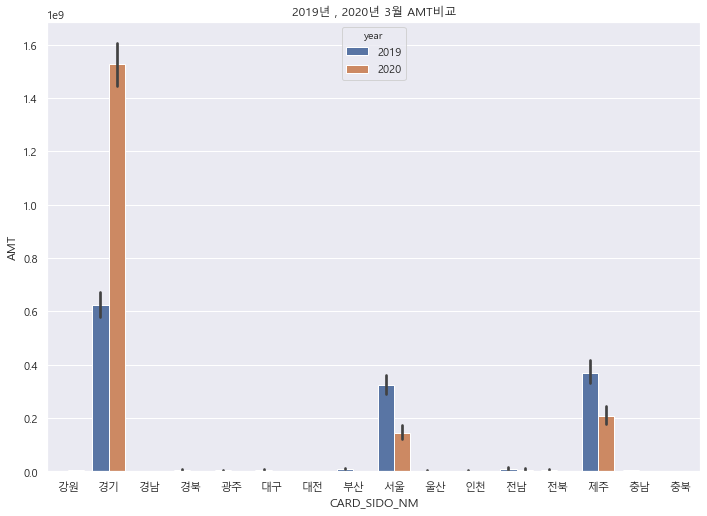

In [11]:
for i in range(1, 4):
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    plt.rcParams['font.family'] = 'Malgun Gothic'
    df_month = df[df.month == i]
    sns.barplot(data = df_month, x = 'CARD_SIDO_NM', y = 'AMT', hue = 'year',  estimator = sum)
    plt.title("2019년 , 2020년 %d월 AMT비교" %i)
    plt.show()

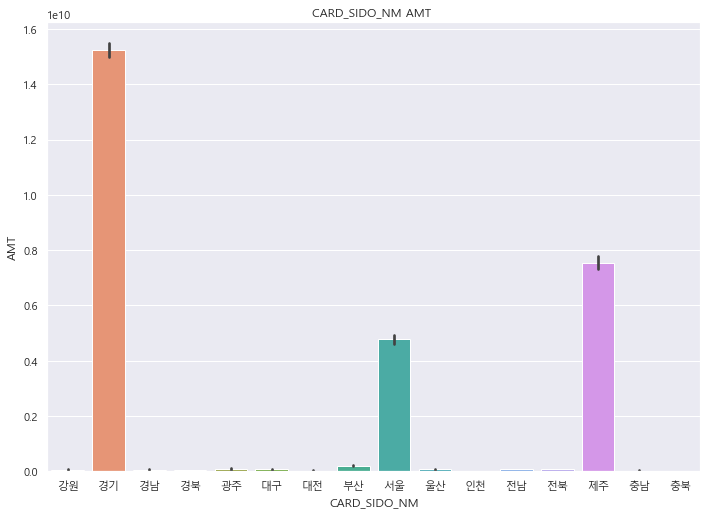

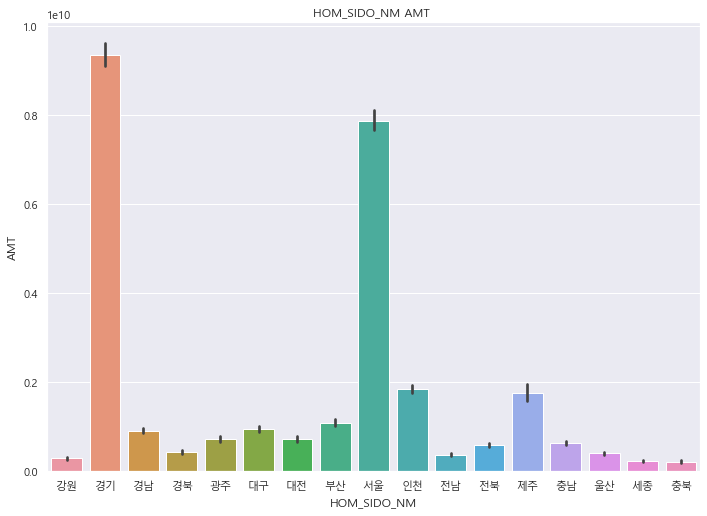

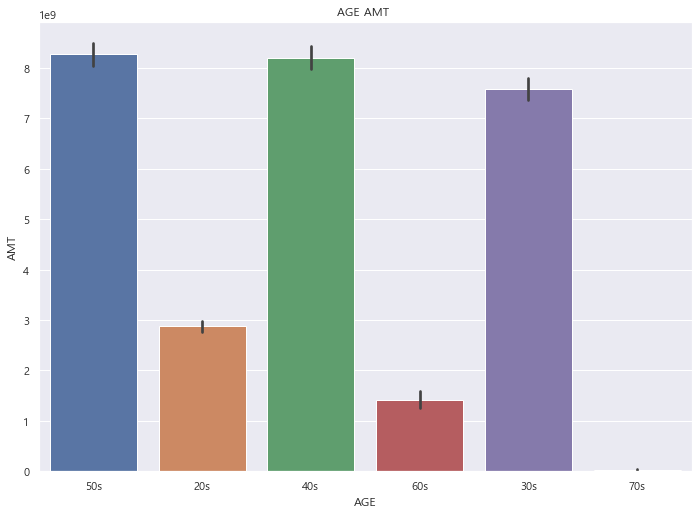

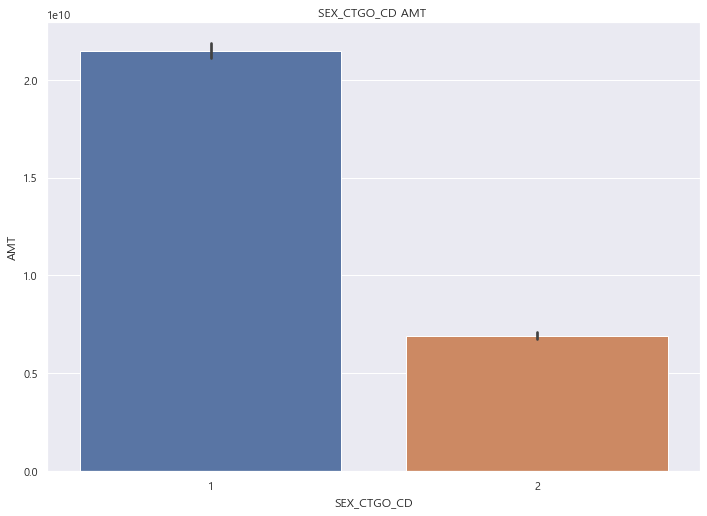

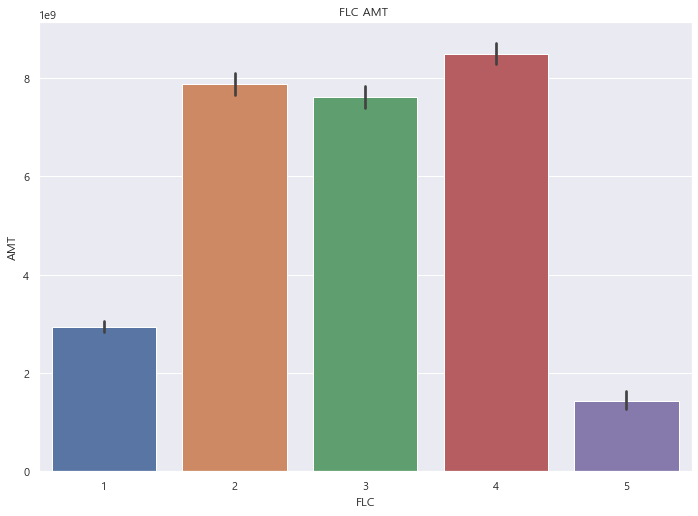

In [17]:
cols = ['CARD_SIDO_NM', 'HOM_SIDO_NM','AGE','SEX_CTGO_CD', 'FLC']
for val in cols:
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    plt.rcParams['font.family'] = 'Malgun Gothic'
    sns.barplot(data = df, y = 'AMT', x = val, orient = 'v',estimator = sum)
    plt.title(val +' AMT ')
    plt.show()

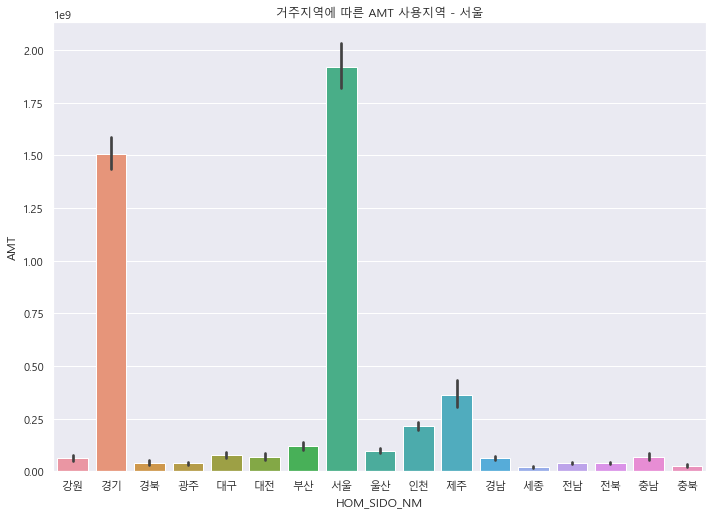

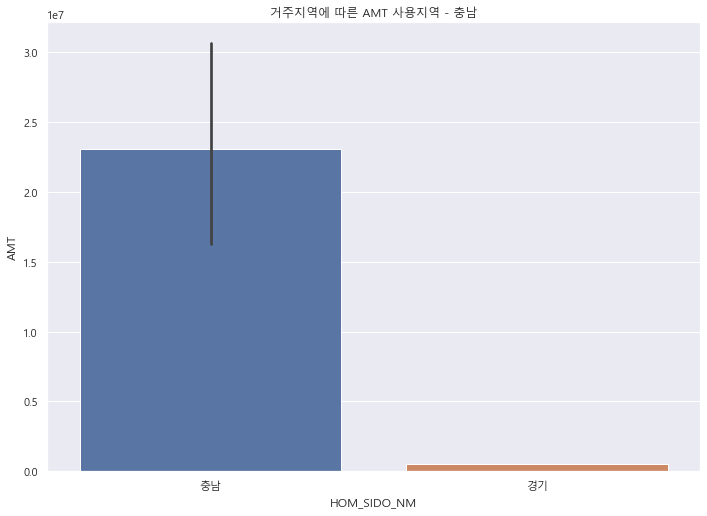

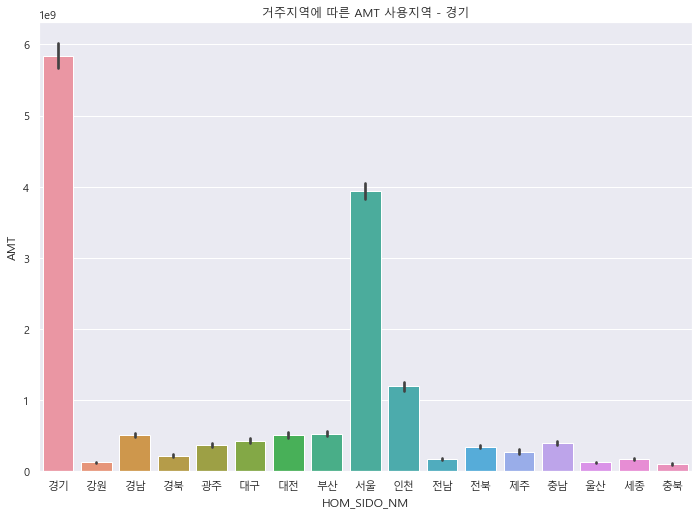

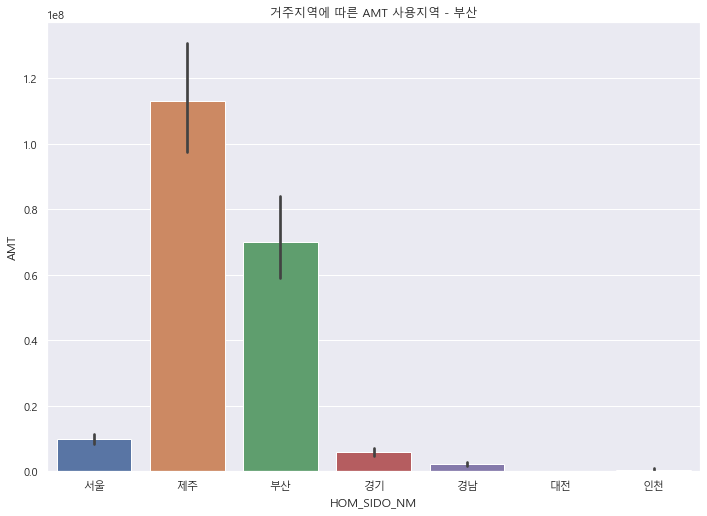

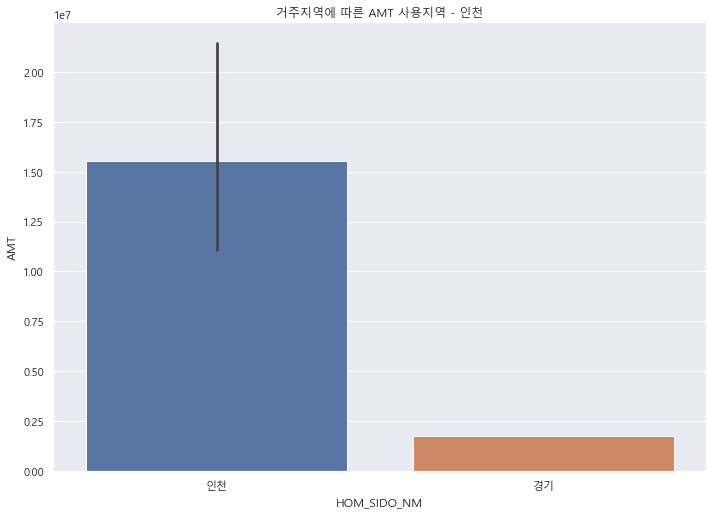

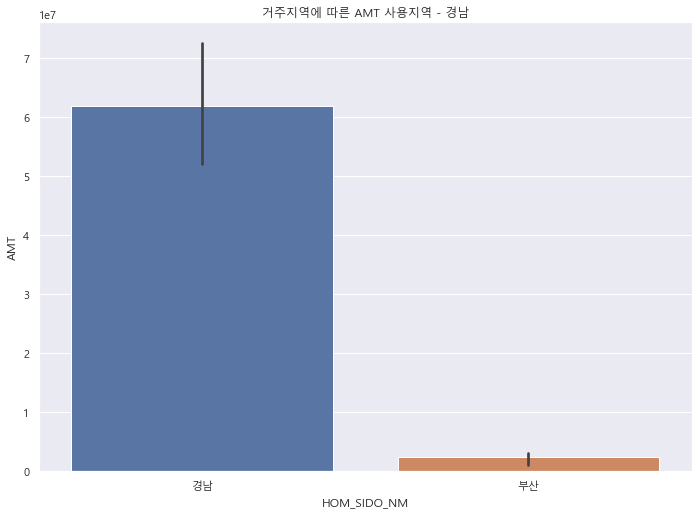

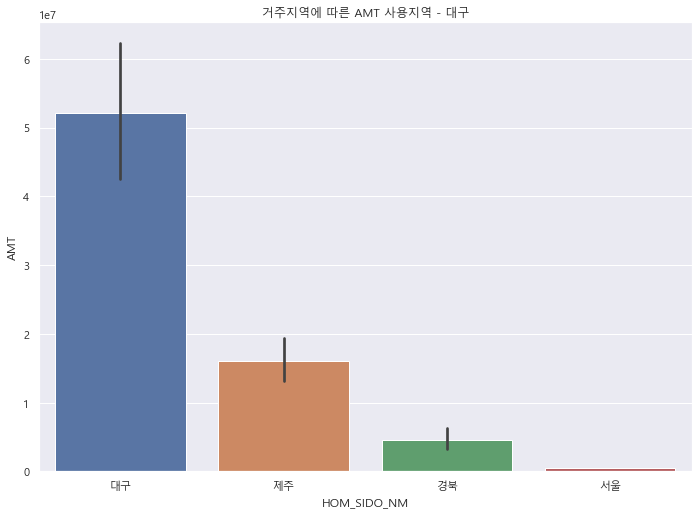

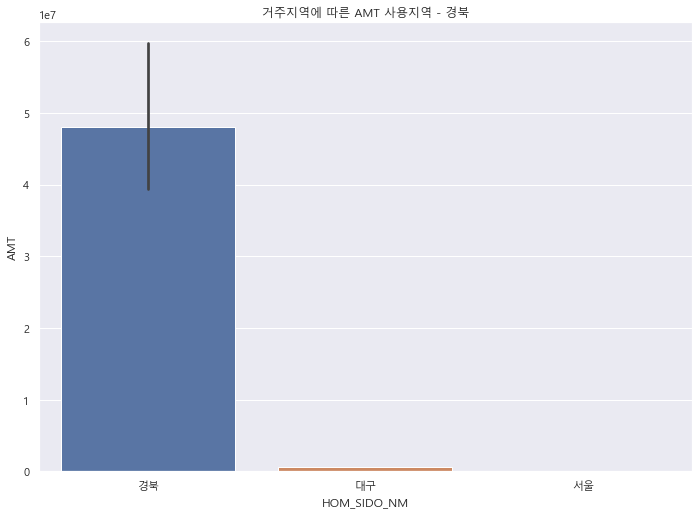

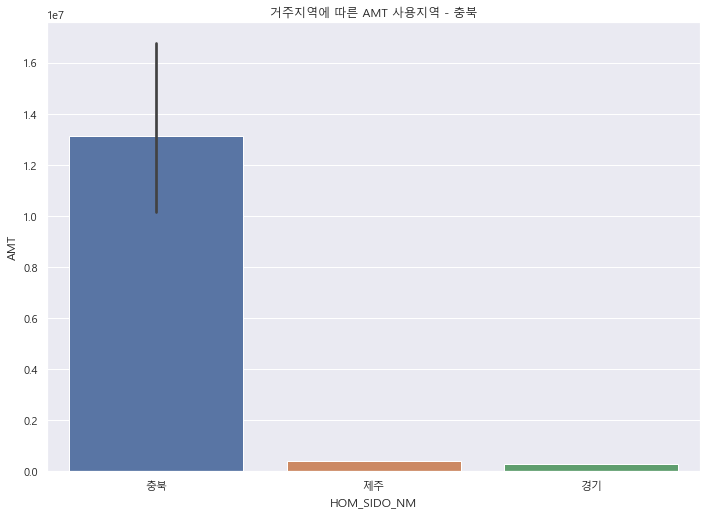

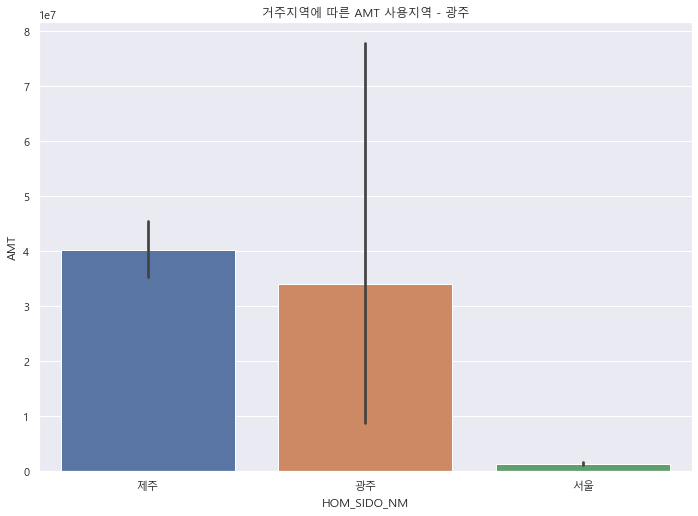

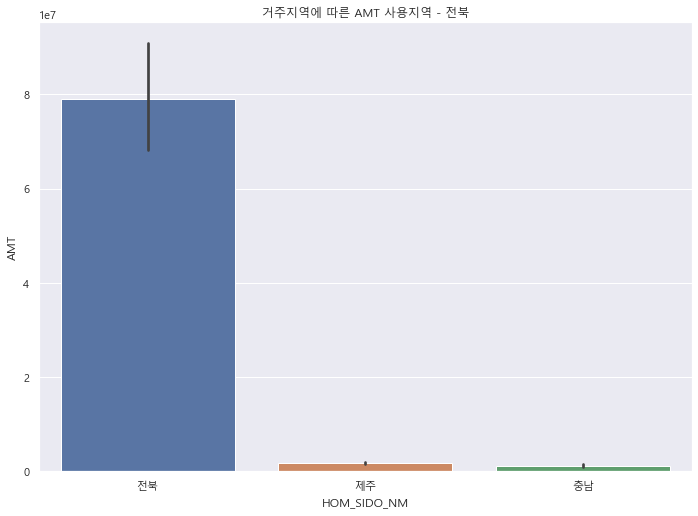

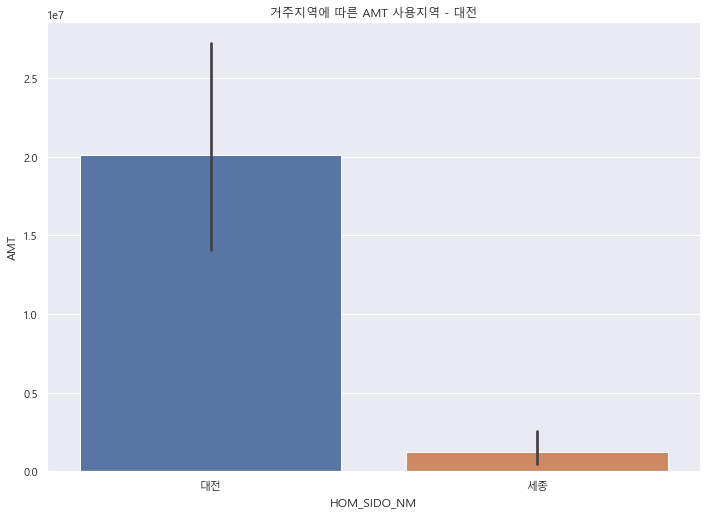

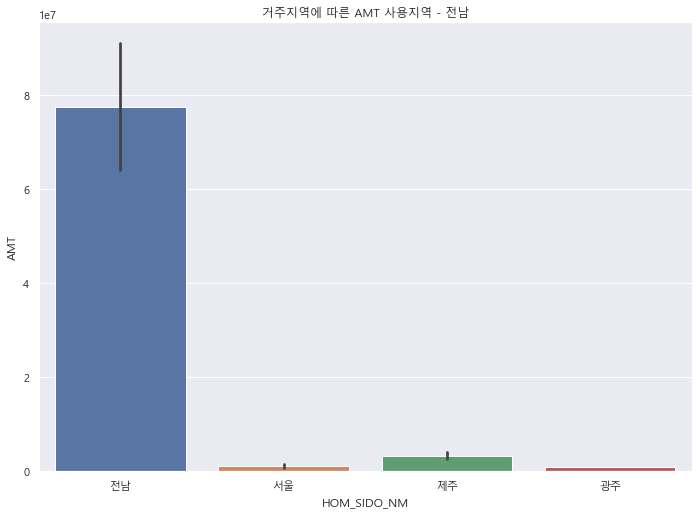

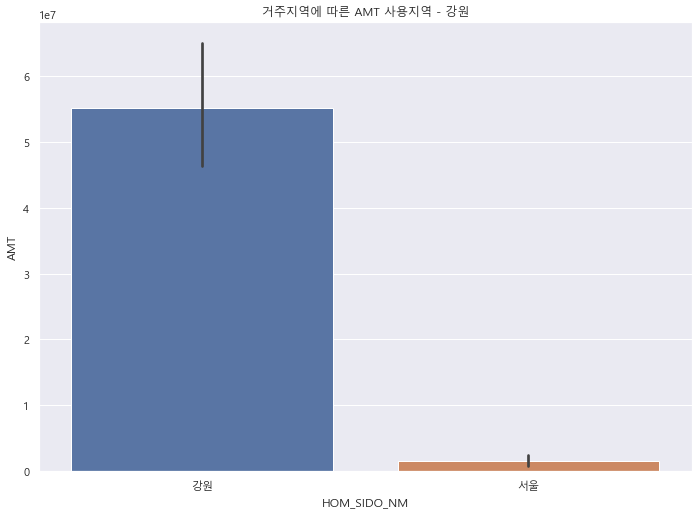

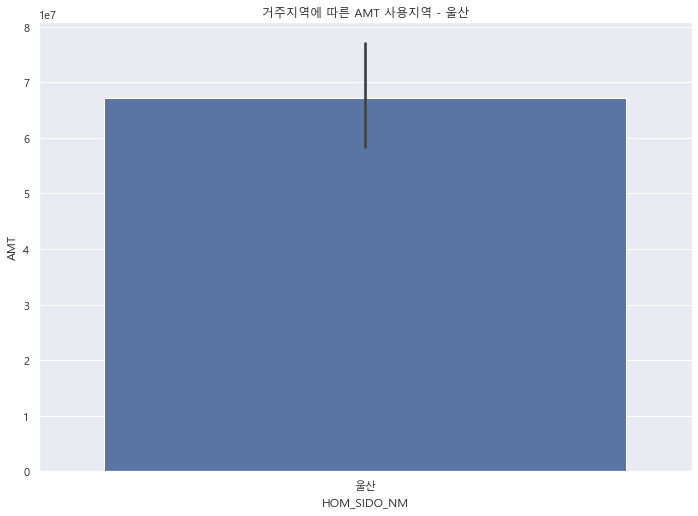

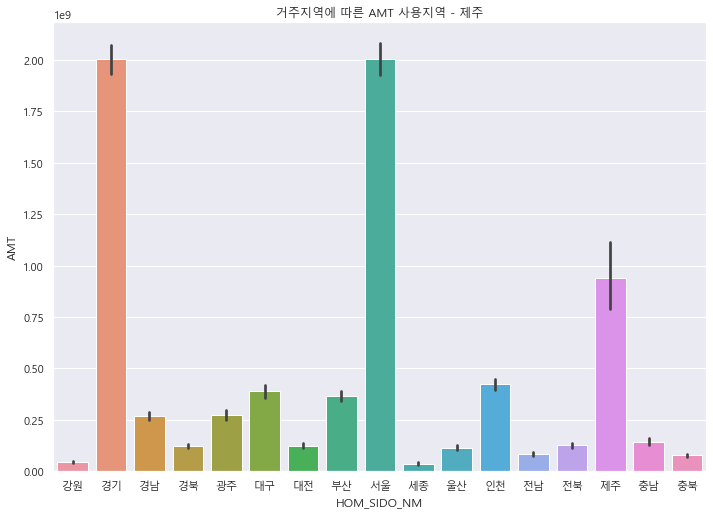

ValueError: min() arg is an empty sequence

In [10]:
cols = ['서울', '충남', '경기', '부산', '인천','경남', '대구', '경북', '충북', '광주','전북','대전', '전남', '강원', '울산', '제주', '세종']
    
for val in cols:
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    plt.rcParams['font.family'] = 'Malgun Gothic'
    sns.barplot(data = df[df.CARD_SIDO_NM == val], x = 'HOM_SIDO_NM', y = 'AMT',  estimator = sum)
    plt.title('거주지역에 따른 AMT 사용지역 - ' + val)
    plt.show()